In [1]:
from daomechanics.gravity import *
from dao_util.plot_forces import *
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from random import *
import numpy as np

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;N-bodies problem and Barnes-Hut algorithm

 ###### Author : &nbsp;&nbsp;&nbsp;David Stankov

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Introduction   <br> 
&nbsp;&nbsp;&nbsp; Many physical problems involve interaction between many bodies.The most famous example is interaction under gravity force wich is noted $\vec{G_{ij}}= G.m_j.m_i.\frac{\vec{r_j} - \vec{r_i}}{|\vec{r_j}-\vec{r_i}|^3}$ where $i \neq j$, G is gravity constant,m is the mass. Example for 3 bodies is 
 

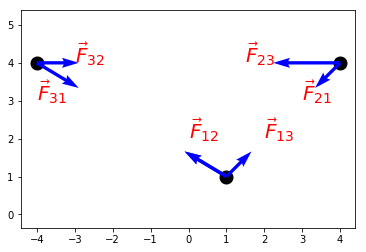

In [2]:
show_force_image()

The equtions of motion according second law can be written:
    1) $\frac{d^2\vec{r_i}}{dt^2}m_i=\sum_{j=1}^{n}\vec{G_{ij}}$ where $\vec{r(t)}$ is the radius vector or eaqtion of motions 

The only way to be solved above eaqtion in case when n>2 is numerical.The task of evaluating the eation  for all N bodies using (1) requires O(n)
operations for each particle, resulting in a total complexity of O(n2
). In this paper we
will see how this complexity can be reduced to O(n log n) or O(n) by using Barnes-Hut akgorithm
 to approximate the sum in the right hand term of (1)

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Abstract   <br> 
The heart of solution of n-bodies problem is to use  center of mass.The definition of center of mass for bodies is $$ \vec{R}=\frac{\sum_{i=1}^{n}\vec{r_i}m_i}{\sum_{j=1}^{n}m_i}$$.
When we investigate the $\vec{F_{1i}} = \vec{F_{21}}+\vec{F_{31}}$ when the distance betwenn body 2 and body 1 is $r_{23}<<r_{12} and <<r_{13}$then we can aproxiamte the eation from 2 to 1 using the center of mass of boyd 1 abd body to and written 

$$\vec{F_1} = \vec{F_{21}} + \vec{F_{31}} \approx \vec{R_{23}}.M$$where M = $\sum_{j=1}^{n}m_i$


## Methods <br>
#### The Barnes-Hut algorithm <br>
The crucial idea in speeding up the brute force algorith is to group nearby bodies and appoximate them as a single body.If the frpoup is sufficiently far away,we can approximate its gravitation effects by using center of mass.The center of mass of a group of bodies is the average position of a body in that group, weighted by mass. Formally, if two bodies have positions (x1 , y1) and (x2, y2), and masses m1 and m2, then their total mass and center of mass (x, y) are given by:


The Barnes-Hut algorithm is a clever scheme for grouping together bodies that are sufficiently nearby. It recursively divides the set of bodies into groups by storing them in a quad-tree. A quad-tree is similar to a binary tree, except that each node has 4 children (some of which may be empty). Each node represents a region of the two dimensional space. The topmost node represents the whole space, and its four children represent the four quadrants of the space. As shown in the diagram, the space is recursively subdivided into quadrants until each subdivision contains 0 or 1 bodies (some regions do not have bodies in all of their quadrants. Hence, some internal nodes have less than 4 non-empty children). Each external node represents a single body. Each internal node represents the group of bodies beneath it, and stores the center-of-mass and the total mass of all its children bodies. Here is an example with 8 bodies.



In [3]:
%%html
<img src="sources/example1.gif",width=60,height=60>

To calculate the net force on a particular body, traverse the nodes of the tree, starting from the root. If the center-of-mass of an internal node is sufficiently far from the body, approximate the bodies contained in that part of the tree as a single body, whose position is the group's center of mass and whose mass is the group's total mass. The algorithm is fast because we don't need to individually examine any of the bodies in the group. If the internal node is not sufficiently far from the body, recursively traverse each of its subtrees. To determine if a node is sufficiently far away, compute the quotient s / d, where s is the width of the region represented by the internal node, and d is the distance between the body and the node's center-of-mass. Then, compare this ratio against a threshold value θ. If s / d < θ, then the internal node is sufficiently far away. By adjusting the θ parameter, we can change the speed and accuracy of the simulation. We will always use θ = 0.5, a value commonly used in practice. Note that if θ = 0, then no internal node is treated as a single body, and the algorithm degenerates to brute force.

Constructing the Barnes-Hut tree. To construct the Barnes-Hut tree, insert the bodies one after another. To insert a body b into the tree rooted at node x, use the following recursive procedure:

If node x does not contain a body, put the new body b here.
If node x is an internal node, update the center-of-mass and total mass of x. Recursively insert the body b in the appropriate quadrant.
If node x is an external node, say containing a body named c, then there are two bodies b and c in the same region. Subdivide the region further by creating four children. Then, recursively insert both b and c into the appropriate quadrant(s). Since b and c may still end up in the same quadrant, there may be several subdivisions during a single insertion. Finally, update the center-of-mass and total mass of x.
As an example, consider the 5 bodies in the diagram below. In our examples, we use the convention that the branches, from left to right, represent the northwest, northeast, southwest, and southeast quadrants, respectively. The tree goes through the following stages as the bodies 

In [4]:
%%html
<img src="sources/example2.gif",width=100,height=20>

he root node contains the center-of-mass and total mass of all five bodies. The two other internal nodes each contain the center-of-mass and total mass of the bodies b, c, and d.

alculating the force acting on a body. To calculate the net force acting on body b, use the following recursive procedure, starting with the root of the quad-tree:

If the current node is an external node (and it is not body b), calculate the force exerted by the current node on b, and add this amount to b's net force.
Otherwise, calculate the ratio s / d. If s / d < θ, treat this internal node as a single body, and calculate the force it exerts on body b, and add this amount to b's net force.
Otherwise, run the procedure recursively on each of the current node's children.
As an example, to calculate the net force acting on body a, we start at the root node, which is an internal node. It represents the center-of-mass of the five bodies a, b, c, d, and e, which have masses 1, 2, 3, 4, and 5 kg, respectively. The force calculation proceeds as follows:

In [5]:
%%html
<img src="sources/example2.gif",width=1000,height=20>

The first node examined is the root. The quotient s/d = 100/55.7 > θ = 0.5, so we perform the process recursively on each of the root's children.
The first child is body a itself. A node does not exert force on itself, so we don't do anything.
This child represents the northeast quadrant of the space, and contains the center-of-mass of bodies b, c, and d. Now s/d = 50/77.4 > θ so we recursively calculate the force exerted by the node's only child.
This is also an internal node, representing the northeast quadrant of its parent, and containing the center-of-mass of bodies b, c, and d. Now s/d = 25/77.4 < &theta. Treating the internal node as a single body whose mass is the sum of the masses of b, c, and d, we calculate the force exerted on body a, and add this value to the net force exerted on a. Since the parent of this node has no more children, we continue examining the other children of the root.
The next child is the one containing body e. This is an external node, so we calculate the pairwise force between a and e, and add this to a's net force.

https://beltoforion.de/article.php?a=barnes-hut-galaxy-simulator

Leap Frog
https://en.wikipedia.org/wiki/Leapfrog_integration

The leapfrog integration is method for numericaly integrating of differential eqationss of the form 
$$ \frac{d^2x}{dx^2} = F(x) $$ 

eapfrog integration is a second-order method, in contrast to Euler integration, which is only first-order, yet requires the same number of function evaluations per step. Unlike Euler integration, it is stable for oscillatory motion, as long as the time-step {\displaystyle \Delta t} \Delta t is constant, and {\displaystyle \Delta t\leq 2/\omega } \Delta t\leq 2/\omega 


$$a_i = F(x_i) $$
$$v_{i+1/2} = v_{i-1/2} + a_i \Delta t  $$
$$x_i+1 =x_i + v_{i+1/2} \Delta{t}$$
where $x_i$ is position at step  i, $v_{i+1/2}$  is the velocity, or first derivative of  x, at step i+1/2 , $a_i=F(x_i)$ is accelaration or second derivate x ,at step i,and $ \Delta t $ is the size of each time step. 
These equations can be expressed in a form that gives velocity at integer steps as well:
$$x_{i+1} =x_i +v_i\Delta t + \frac{1}{2}a_i\Delta t^2$$
$$v_{i+1} =v_i + \frac{1}{2}(a_i + a_i+1)\Delta t$$
However, even in this synchronized form, the time-step {\displaystyle \Delta t} \Delta t must be constant to maintain stability.[3]

The synchronised form can be re-arranged to the 'kick-drift-kick' form;
$$v_{i+1/2} =v_i +a_i\frac{\Delta t}{2}$$
$$x_{i+1} =x_i +v_{i/2}\Delta t$$
$$v_{i} =v_{i+1/2} +a_{i+1}\frac{\Delta t}{2}$$
which is primarily used where variable time-steps are required.
In this project uses he 'kick-drift-kick' form.


In [6]:
%%HTML
<video width="500" height="540" controls>
  <source src="video\3.mp4" type="video/mp4">
</video>

In [7]:
%%HTML
<video width="500" height="540" controls>
  <source src="video\3-1.mp4" type="video/mp4">
</video>

In [8]:
%%HTML
<video width="500" height="540" controls>
  <source src="video\3-3.mp4" type="video/mp4">
</video>

In [9]:
%%HTML
<video width="500" height="540" controls>
  <source src="video\g-1.mp4" type="video/mp4">
</video>